# Исследование надежности заемщиков.

В целях оценки способности потенциального заёмщика вернуть кредит банку (при построении модели кредитного скоринга), проводим исследование влияния семейного положения и количества детей клиента на факт погашения кредита в срок.

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
print(f'В таблице двенадцать столбцов: {list(df.columns)}')

В таблице двенадцать столбцов: ['children', 'days_employed', 'dob_years', 'education', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose']


В названиях колонок отсутствует нарушение стиля.

Столбцы включают в себя все типы данных.

Согласно документации к данным:
* `children` — количество детей в семье;
* `days_employed` — общий трудовой стаж в днях; 
* `dob_years` — возраст клиента в годах; 
* `education` — уровень образования клиента; 
* `education_id` — идентификатор уровня образования;
* `family_status` — семейное положение; 
* `family_status_id` — идентификатор семейного положения; 
* `gender` — пол клиента;
* `income_type` — тип занятости; 
* `debt` — имел ли задолженность по возврату кредитов; 
* `total_income` — ежемесячный доход; 
* `purpose` — цель получения кредита.

Количество значений в столбцах `days_employed` и `total_income` различаются — в данных есть пропущенные значения.

In [5]:
'Инофрмация о пропусках'
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [7]:
'Полные дубликаты'
df.duplicated().sum()


54

**Выводы**

В каждой строке таблицы — данные о заемщике. Колонки включают в себя описание заемщика: его социальный статус, взаимоотношение с кредитными учреждениями и цель займа.

Предварительно:

В колонках `days_employed` и `total_income` встречаются пропуски.

Столбец `total_income` состоит из вещественных типов данных - целесообразно, в целях проведения расчета, перевести  в целочисленный.

В столбце `days_employed` присутствуют отрицательные значения.	

В столбце `education` присутствуют строчные и прописные значения.

В столбце `purpose` присутствуют большое многообразие целей получения кредита.	

В таблице присутсвуют 54 полных дубликатов.

Требуется устранить проблемы в данных.

## Обработка данных

### Заполнение пропусков

Проведем анализ пропусков в столбцах `days_employed` и `total_income`.

In [8]:
df[df['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [9]:
df[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


NaN замещает отсутствующее в ячейке число и принадлежит к типу float, поэтому с ним можно проводить математические операции.

In [10]:
total_rows = df.shape[0]
missing_rows1 = df['total_income'].isna().sum()
missing_rows2 = df['days_employed'].isna().sum()
display('Доля пропущенных значений в столбце total_income: {:.0%}'.format(missing_rows1/total_rows))
display('Доля пропущенных значений в столбце days_employed: {:.0%}'.format(missing_rows2/total_rows))

'Доля пропущенных значений в столбце total_income: 10%'

'Доля пропущенных значений в столбце days_employed: 10%'

Отсутствие данных в столбцах `days_employed` и `total_income` в одной и той же строчке, в одном и том же объеме может свидетельствовать о нежелании заемщика предоставлять информацию о своем уровне дохода и стаже трудовой деятельности (персональные данные).

Для определения медианы отсортируем список по убыванию.

In [11]:
df = df.sort_values(by='total_income', ascending=False)

In [12]:
total_income_med = df['total_income'].median()
print(f'Медианное значение ежемесячного дохода: {total_income_med}')
print('СПРАВОЧНО:')
print(f"Среднемесячный доход: {df['total_income'].mean()}") 
print(f"Минимальный доход: {df['total_income'].min()}")
print(f"Максимальный доход: {df['total_income'].max()}") 

Медианное значение ежемесячного дохода: 145017.93753253992
СПРАВОЧНО:
Среднемесячный доход: 167422.30220817216
Минимальный доход: 20667.26379327158
Максимальный доход: 2265604.028722744


Меняем пропущенные показатели в столбце `total_income` на медианное значение ежемесячного дохода. 

Проверяем внесенные изменения.

In [13]:
df['total_income'] = df['total_income']. fillna(total_income_med)
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

Среднее и медиана оценивают значения в центре выборки. Если заемщиков с высоким доход столько же сколько и заемщиков с низким доходом, то при расчете можно использовать среднею. Но на практике такого нет - всегда есть лидеры их результаты смещают значение среднего показателя. Оценивать большой массив данных лучше медианой.

<AxesSubplot:xlabel='total_income', ylabel='Count'>

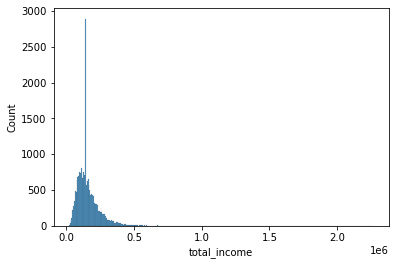

In [14]:
sns.histplot(df['total_income'])

### Проверка данных на аномалии и исправления.

In [15]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12412,0,-1477.438114,44,высшее,0,женат / замужем,0,M,компаньон,0,2.265604e+06,ремонт жилью
19606,1,-2577.664662,39,высшее,0,женат / замужем,0,M,компаньон,1,2.200852e+06,строительство недвижимости
9169,1,-5248.554336,35,среднее,1,гражданский брак,1,M,сотрудник,0,1.726276e+06,дополнительное образование
20809,0,-4719.273476,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1.715018e+06,покупка жилья для семьи
17178,0,-5734.127087,42,высшее,0,гражданский брак,1,M,компаньон,0,1.711309e+06,сыграть свадьбу


In [16]:
minus_rows = 0
plus_rows = 0
for index in df['days_employed']:
    if index < 0:
        minus_rows += 1
    if index >= 0:
        plus_rows +=1
print(f'Отрицательные значения: {minus_rows}') 
print(f'Положительные значения: {plus_rows}')
print(f'Всего: {minus_rows+plus_rows}')

Отрицательные значения: 15906
Положительные значения: 3445
Всего: 19351


In [17]:
df['days_employed'].count()

19351

В столбце `days_employed` доминируют отрицательные значения. Появление данной аномалии возможно связано с техническим сбоем при импорте показателей в столбец `days_employed` или ошибкой ручного ввода при использовании знака тире.

Переводим отрицательные значения столбца `days_employed` в положительные. 

In [18]:
df['days_employed'] = df['days_employed'].abs()

Проверяем внесенные изменения.

In [19]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12412,0,1477.438114,44,высшее,0,женат / замужем,0,M,компаньон,0,2.265604e+06,ремонт жилью
19606,1,2577.664662,39,высшее,0,женат / замужем,0,M,компаньон,1,2.200852e+06,строительство недвижимости
9169,1,5248.554336,35,среднее,1,гражданский брак,1,M,сотрудник,0,1.726276e+06,дополнительное образование
20809,0,4719.273476,61,среднее,1,Не женат / не замужем,4,F,сотрудник,0,1.715018e+06,покупка жилья для семьи
17178,0,5734.127087,42,высшее,0,гражданский брак,1,M,компаньон,0,1.711309e+06,сыграть свадьбу


In [20]:
minus_rows = 0
plus_rows = 0
for index in df['days_employed']:
    if index < 0:
        minus_rows += 1
    if index >= 0:
        plus_rows +=1
print(f'Отрицательные значения: {minus_rows}') 
print(f'Положительные значения: {plus_rows}')
print(f'Всего: {minus_rows+plus_rows}')

Отрицательные значения: 0
Положительные значения: 19351
Всего: 19351


Для определения медианы отсортируем список по убыванию.

In [21]:
df = df.sort_values(by='days_employed', ascending=False)

In [22]:
days_employed_med = df['days_employed'].median()
print(f'Медианное значение трудового стажа в днях: {days_employed_med}')

Медианное значение трудового стажа в днях: 2194.220566878695


Меняем пропущенные показатели в столбце `total_income` на медианное значение ежемесячного дохода.

Проверяем внесенные изменения.

In [23]:
df['days_employed'] = df['days_employed']. fillna(days_employed_med)
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [24]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

В столбце `children` отрицательные значения. Появление данной аномалии возможно связано с ошибкой ручного ввода при использовании знака тире.

 Анамальное зачание в 20 детей в 76 семей меняем на медианное значение.

In [25]:
child_med = df.loc[df.loc[:, 'children'] != 20]['children'].median()

df['children'] = df['children'].replace(20, int(child_med))

Переводим отрицательные значения столбца `children` в положительные.

In [26]:
df['children'] = df['children'].abs()

Проверяем внесенные изменения.

In [27]:
df['children'].value_counts()

0    14225
1     4865
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

### Изменение типов данных.

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода astype().

In [28]:
df['total_income'] = df['total_income'].astype('int')

Проверяем внесенные изменения.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 6954 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 2.1+ MB


### Удаление дубликатов.

Выявляем неявные дубликаты в столбце`education`.

In [30]:
df.sort_values(by='education')['education'].unique()


array(['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее',
       'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное',
       'неоконченное высшее', 'среднее', 'ученая степень'], dtype=object)

In [31]:
df['education'].nunique()

15

In [32]:
df['education'] = df['education'].str.lower()

Проверяем внесенные изменения.

In [33]:
df.sort_values(by='education')['education'].unique()

array(['высшее', 'начальное', 'неоконченное высшее', 'среднее',
       'ученая степень'], dtype=object)

In [34]:
df['education'].nunique()

5

Количество неявных дубликатов в столбце `education` уменьшилось в три раза с 15 до 5.

Проверяем остальные столбцы с типом данных `object` на неявные дубликаты. Проверять на неявные дубликаты целесообразно только столбцы с типом данных `object`. В столбцах с типом данных `int` и `float` неявные дубликаты не выделишь.

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 6954 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 2.1+ MB


Приводим в строчные значения `Не женат / не замужем`

In [36]:
df.sort_values(by='family_status')['family_status'].unique()

array(['Не женат / не замужем', 'в разводе', 'вдовец / вдова',
       'гражданский брак', 'женат / замужем'], dtype=object)

In [37]:
df['family_status'] = df['family_status'].replace('Не женат / не замужем', 'не женат / не замужем') 

Проверяем внесенные изменения.

In [38]:
df.sort_values(by='family_status')['family_status'].unique()

array(['в разводе', 'вдовец / вдова', 'гражданский брак',
       'женат / замужем', 'не женат / не замужем'], dtype=object)

In [39]:
df.sort_values(by='gender')['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [40]:
df['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [41]:
df.groupby('gender').sum()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
gender,,,,,,,
F,6382,1.053993e+09,633103,11481,14414,994,2.180251e+09
M,3792,2.456422e+08,298763,6108,6519,747,1.374592e+09
XNA,0,2.358601e+03,24,2,1,0,2.039050e+05


Данные по строке `XNA` не оказывают существенного влияния на расчет. Приводим  `gender` к `F`- наибольшей величине.

In [42]:
df['gender'] = df['gender'].replace('XNA', 'F') 

Проверяем внесенные изменения.

In [43]:
df.sort_values(by='gender')['gender'].unique()

array(['F', 'M'], dtype=object)

In [44]:
df.sort_values(by='income_type')['income_type'].unique()

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

В столбце `income_type` правок не требуется.

In [45]:
df.sort_values(by='purpose')['purpose'].unique()

array(['автомобили', 'автомобиль', 'высшее образование',
       'дополнительное образование', 'жилье',
       'заняться высшим образованием', 'заняться образованием',
       'на покупку автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'на проведение свадьбы',
       'недвижимость', 'образование', 'операции с жильем',
       'операции с коммерческой недвижимостью',
       'операции с недвижимостью', 'операции со своей недвижимостью',
       'покупка жилой недвижимости', 'покупка жилья',
       'покупка жилья для сдачи', 'покупка жилья для семьи',
       'покупка коммерческой недвижимости', 'покупка недвижимости',
       'покупка своего жилья', 'получение высшего образования',
       'получение дополнительного образования', 'получение образования',
       'приобретение автомобиля', 'профильное образование',
       'ремонт жилью', 'свадьба', 'свой автомобиль',
       'сделка с автомобилем', 'сделка с подержанным автомобилем',
       'строительство 

В столбце `purpose` присутствуют большое многообразие целей получения кредита. Удаляем неявные дубликаты.

In [46]:
def replace_wrong_purpose (wrong_purpose, correct_purpose): 
    for wrong_purpose in wrong_purpose: 
        df['purpose'] = df['purpose'].replace(wrong_purpose, correct_purpose) 
replace_wrong_purpose(['автомобили',
                       'автомобиль',
                       'на покупку подержанного автомобиля',
                       'на покупку своего автомобиля',
                       'свой автомобиль',
                       'сделка с автомобилем',
                       'сделка с подержанным автомобилем',
                       'на покупку автомобиля'],
                      'приобретение автомобиля'
                     )
replace_wrong_purpose(['высшее образование',
                       'дополнительное образование',
                       'заняться высшим образованием',
                       'заняться образованием',
                       'образование',
                       'получение высшего образования',
                       'получение дополнительного образования',
                       'профильное образование'],
                      'получение образования'
                     )
replace_wrong_purpose(['жилье',
                       'недвижимость',
                       'операции с жильем',
                       'операции с коммерческой недвижимостью',
                       'операции со своей недвижимостью',
                       'покупка жилой недвижимости',
                       'покупка жилья',
                       'покупка жилья для сдачи',
                       'покупка жилья для семьи',
                       'покупка коммерческой недвижимости',
                       'покупка недвижимости',
                       'покупка своего жилья',
                       'ремонт жилью','строительство жилой недвижимости',
                       'строительство недвижимости',
                       'строительство собственной недвижимости'],
                      'операции с недвижимостью'
                     )
replace_wrong_purpose(['свадьба',
                       'сыграть свадьбу'],
                      'на проведение свадьбы'
                     )

Проверяем внесенные изменения.

In [47]:
df.sort_values(by='purpose')['purpose'].unique()

array(['на проведение свадьбы', 'операции с недвижимостью',
       'получение образования', 'приобретение автомобиля'], dtype=object)

Появление неявных дубликатов обусловлено человеческим фактором - ручным вводом информации.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21525 entries, 6954 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 2.1+ MB


In [49]:
'Полные дубликаты'
df.duplicated().sum()

407

Удаляем полные дубликаты.

In [50]:
df = df.drop_duplicates().reset_index(drop=True)

Проверяем внесенные изменения.

In [51]:
'Полные дубликаты'
df.duplicated().sum()

0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21118 entries, 0 to 21117
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21118 non-null  int64  
 1   days_employed     21118 non-null  float64
 2   dob_years         21118 non-null  int64  
 3   education         21118 non-null  object 
 4   education_id      21118 non-null  int64  
 5   family_status     21118 non-null  object 
 6   family_status_id  21118 non-null  int64  
 7   gender            21118 non-null  object 
 8   income_type       21118 non-null  object 
 9   debt              21118 non-null  int64  
 10  total_income      21118 non-null  int32  
 11  purpose           21118 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 1.9+ MB


Количество строк уменьшилось на 407(было 21525) - удалены полные дубликаты. Появление полных дубликатов возможно связано с объединением нескольких таблиц без проверки на дубликаты.

### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создаем новый датафрейм `df_education` - словарь где `education` (уровень образования клиента) соотвествует `education_id` ( идентификатор уровня образования).

In [53]:
df_education = df[['education', 'education_id']]
df_education.head(10)

,education,education_id
0,среднее,1
1,высшее,0
2,среднее,1
3,среднее,1
4,среднее,1
5,среднее,1
6,среднее,1
7,среднее,1
8,среднее,1
9,среднее,1


Удаляем полные дубликаты.

In [54]:
df_education = df_education.drop_duplicates().reset_index(drop=True)
df_education.head(10)

,education,education_id
0,среднее,1
1,высшее,0
2,начальное,3
3,неоконченное высшее,2
4,ученая степень,4


Создаем новый датафрейм `df_family_status` - словарь где  `family_status` (семейное положение) соответствует`family_status_id` (идентификатор семейного положения).

In [55]:
df_family_status = df[['family_status', 'family_status_id']]
df_family_status.head(10)

,family_status,family_status_id
0,вдовец / вдова,2
1,не женат / не замужем,4
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1
5,женат / замужем,0
6,гражданский брак,1
7,женат / замужем,0
8,в разводе,3
9,женат / замужем,0


Удаляем полные дубликаты.

In [56]:
df_family_status = df_family_status.drop_duplicates().reset_index(drop=True)
df_family_status.head(10)

,family_status,family_status_id
0,вдовец / вдова,2
1,не женат / не замужем,4
2,женат / замужем,0
3,гражданский брак,1
4,в разводе,3


Удаляем из исходного датафрейма столбцы `education` и `family_status`. Оставляем только их идентификаторы: `education_id` и `family_status_id`, так как ранее сформировали справочники.

In [57]:
df = df.drop(['education', 'family_status'], axis=1)
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,0,401755.400475,56,1,2,F,пенсионер,0,176278,операции с недвижимостью
1,0,401715.811749,69,0,4,F,пенсионер,0,57390,получение образования
2,1,401675.093434,61,1,0,F,пенсионер,0,126214,операции с недвижимостью
3,0,401674.466633,60,1,0,M,пенсионер,0,325395,приобретение автомобиля
4,0,401663.850046,61,1,1,F,пенсионер,0,48286,на проведение свадьбы
5,0,401635.032697,56,1,0,F,пенсионер,0,48242,операции с недвижимостью
6,0,401619.633298,63,1,1,F,пенсионер,0,51449,на проведение свадьбы
7,0,401614.475622,59,1,0,F,пенсионер,0,152769,операции с недвижимостью
8,0,401591.828457,56,1,3,F,пенсионер,0,39513,получение образования
9,0,401590.452231,58,1,0,F,пенсионер,0,175306,получение образования


### Категоризация дохода.

Создаем столбец `total_income_category` с категориями:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

In [58]:
def total_income_range(income):
    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'    
    return 'A'
df['total_income_category'] = df['total_income'].apply(total_income_range)
df.head(15)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,0,401755.400475,56,1,2,F,пенсионер,0,176278,операции с недвижимостью,C
1,0,401715.811749,69,0,4,F,пенсионер,0,57390,получение образования,C
2,1,401675.093434,61,1,0,F,пенсионер,0,126214,операции с недвижимостью,C
3,0,401674.466633,60,1,0,M,пенсионер,0,325395,приобретение автомобиля,B
4,0,401663.850046,61,1,1,F,пенсионер,0,48286,на проведение свадьбы,D
5,0,401635.032697,56,1,0,F,пенсионер,0,48242,операции с недвижимостью,D
6,0,401619.633298,63,1,1,F,пенсионер,0,51449,на проведение свадьбы,C
7,0,401614.475622,59,1,0,F,пенсионер,0,152769,операции с недвижимостью,C
8,0,401591.828457,56,1,3,F,пенсионер,0,39513,получение образования,D
9,0,401590.452231,58,1,0,F,пенсионер,0,175306,получение образования,C


### Категоризация целей кредита.

Создаем функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:
* 'операции с автомобилем',
* 'операции с недвижимостью',
* 'проведение свадьбы',
* 'получение образования'.

Задача упрощается так как ранее в столбце `purpose`присутствуют большое многообразие целей получения кредита и мы очистели его от неявных дубликатов. 
Остались следующие значения: 
* 'на проведение свадьбы', 
* 'операции с недвижимостью',
* 'получение образования',
* 'приобретение автомобиля'. 

In [59]:
def purpose_category_group(row):
    purpose = row['purpose']
    if purpose in ['приобретение автомобиля']:
        return 'операции с автомобилем'
    elif purpose in ['операции с недвижимостью']:
        return 'операции с недвижимостью'
    elif purpose in ['на проведение свадьбы']:
        return 'проведение свадьбы'
    elif purpose in ['получение образования']:
        return 'получение образования'
df['purpose_category'] = df.apply(purpose_category_group, axis=1)

Проверяем внесенные изменения.

In [60]:
df.sort_values(by='purpose_category')['purpose_category'].unique()

array(['операции с автомобилем', 'операции с недвижимостью',
       'получение образования', 'проведение свадьбы'], dtype=object)

In [61]:
df.head(15)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,0,401755.400475,56,1,2,F,пенсионер,0,176278,операции с недвижимостью,C,операции с недвижимостью
1,0,401715.811749,69,0,4,F,пенсионер,0,57390,получение образования,C,получение образования
2,1,401675.093434,61,1,0,F,пенсионер,0,126214,операции с недвижимостью,C,операции с недвижимостью
3,0,401674.466633,60,1,0,M,пенсионер,0,325395,приобретение автомобиля,B,операции с автомобилем
4,0,401663.850046,61,1,1,F,пенсионер,0,48286,на проведение свадьбы,D,проведение свадьбы
5,0,401635.032697,56,1,0,F,пенсионер,0,48242,операции с недвижимостью,D,операции с недвижимостью
6,0,401619.633298,63,1,1,F,пенсионер,0,51449,на проведение свадьбы,C,проведение свадьбы
7,0,401614.475622,59,1,0,F,пенсионер,0,152769,операции с недвижимостью,C,операции с недвижимостью
8,0,401591.828457,56,1,3,F,пенсионер,0,39513,получение образования,D,получение образования
9,0,401590.452231,58,1,0,F,пенсионер,0,175306,получение образования,C,получение образования


In [62]:
df['purpose_category'].value_counts()

операции с недвижимостью    10576
операции с автомобилем       4272
получение образования        3964
проведение свадьбы           2306
Name: purpose_category, dtype: int64

## Проверка гипотез

1. Зависимость между количеством детей и возвратом кредита в срок.
2. Зависимость между семейным положением и возвратом кредита в срок.
3. Зависимость между уровнем дохода и возвратом кредита в срок.
4. Разные цели кредита влияют на его возврат в срок.

### Зависимость между количеством детей и возвратом кредита в срок.

Рассмотрим столбец`children`- количество детей в семье.

In [63]:
df['children'].value_counts()

0    13903
1     4798
2     2039
3      329
4       40
5        9
Name: children, dtype: int64

Рассимотрим столбец `debt`- задолженность по возврату кредитов, где: 0 - нет задолженности, 1 - имеется задолженность.

In [64]:
df['debt'].value_counts()

0    19379
1     1739
Name: debt, dtype: int64

Создаем пустой новый фрейм данных `debt_children` для выполнения расчетов и ответа на поставленный вопрос, где:
* `children`- количество детей в семье,
* `count_children_debt` - количество семей,
* `sum_children_debt`- количество семей с задолженностью,
* `result_children_debt` - доля семей с задолженностью.

In [65]:
debt_children = pd.DataFrame()
debt_children['count_children_debt'] = df.groupby('children')['debt'].count()
debt_children['sum_children_debt'] = df.groupby('children')['debt'].sum()
debt_children['result_children_debt'] = debt_children['sum_children_debt'] / debt_children['count_children_debt'] 
debt_children.sort_values('result_children_debt', ascending = False)

,count_children_debt,sum_children_debt,result_children_debt
children,,,
4,40,4,0.100000
2,2039,194,0.095145
1,4798,445,0.092747
3,329,27,0.082067
0,13903,1069,0.076890
5,9,0,0.000000


Выявлена следующая зависимость:
* Семьи с 5 детьми имеют больше ответственности и как результат отсутствие задолженность, 
* Бездетные семьи наиболее широкая группа заемщиков с наименьшей задолженность,
* Семьи с 3 детьми более подвержены риску просрочки задолженности,
* Наибольшая группа риска просрочки задолженности семьи с 1 и 2 ребенком,
* Семьи с 4 детьми самая высокая и самая малочисленная группа риска просрочки задолженности.

### Зависимость между семейным положением и возвратом кредита в срок.

Рассмотрим столбец `family_status_id`- количество детей в семье.

In [66]:
df['family_status_id'].value_counts()

0    12075
1     4124
4     2784
3     1193
2      942
Name: family_status_id, dtype: int64

Используем словарь `family_status` (семейное положение) 

In [67]:
df_family_status.head(10)

,family_status,family_status_id
0,вдовец / вдова,2
1,не женат / не замужем,4
2,женат / замужем,0
3,гражданский брак,1
4,в разводе,3


Создаем пустой новый фрейм данных `debt_family_status` для выполнения расчетов и ответа на поставленный вопрос, где:

* `family_status_id` и `family_status`- семейное положение,
* `count_family_status` - количество семей,
* `sum_family_status`- количество семей с задолженностью,
* `result_family_status` - доля семей с задолженностью.

In [68]:
debt_family_status = pd.DataFrame()
debt_family_status['family_status'] = df_family_status['family_status']
debt_family_status['count_family_status'] = df.groupby('family_status_id')['debt'].count()
debt_family_status['sum_family_status'] = df.groupby('family_status_id')['debt'].sum()
debt_family_status['result_family_status'] = debt_family_status['sum_family_status'] / debt_family_status['count_family_status']
debt_family_status.sort_values('result_family_status', ascending = False)

,family_status,count_family_status,sum_family_status,result_family_status
4,в разводе,2784,274,0.098420
1,не женат / не замужем,4124,388,0.094083
0,вдовец / вдова,12075,929,0.076936
3,гражданский брак,1193,85,0.071249
2,женат / замужем,942,63,0.066879


Выявлена следующая зависимость:
* Находящиеся в браке заемщики осознано подходят к займу и несут солидарную ответственность.
* Заёмщики вне брака наиболее рискованная группа по возврату займа.

### Зависимость между уровнем дохода и возвратом кредита в срок.

Используем для анализа данных созданый столбец `total_income_category` где:
* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

In [69]:
df['total_income_category'].value_counts()

C    15680
B     5041
D      350
A       25
E       22
Name: total_income_category, dtype: int64

Создаем пустой новый фрейм данных `debt_family_status` для выполнения расчетов и ответа на поставленный вопрос, где:

* `total_income_category` - категория доходов,
* `count_income_category` - количество семей,
* `sum_income_category`- количество семей с задолженностью,
* `result_income_category` - доля семей с задолженностью.

In [70]:
debt_income_category = pd.DataFrame()
debt_income_category['count_income_category'] = df.groupby('total_income_category')['debt'].count()
debt_income_category['sum_income_category'] = df.groupby('total_income_category')['debt'].sum()
debt_income_category['result_income_category'] = debt_income_category['sum_income_category'] / debt_income_category['count_income_category']
debt_income_category.sort_values('result_income_category', ascending = False)

,count_income_category,sum_income_category,result_income_category
total_income_category,,,
E,22,2,0.090909
C,15680,1358,0.086607
A,25,2,0.080000
B,5041,356,0.070621
D,350,21,0.060000


Выявлена следующая зависимость:
* Заемщики с доходом ниже 30000 наименьшее количество с наибольшей долей прострочки возврата займа. Даже с учетом строгого подхода к решению о выдачи займа данной категории  риск наиболее велик.
* Заёмщики с среднем доходом (от 50000 до 200000) и выше среднего (от 200000) доля просрочки ниже но не намного.
Зависимость между уровнем дохода и возвратом кредита в срок не подлежит жесткой корреляции.

### Разные цели кредита влияют на его возврат в срок.

Рассмотрим столбец `purpose_category` - количество детей в семье.

In [71]:
df['purpose_category'].value_counts()

операции с недвижимостью    10576
операции с автомобилем       4272
получение образования        3964
проведение свадьбы           2306
Name: purpose_category, dtype: int64

Создаем пустой новый фрейм данных `debt_purpose_category` для выполнения расчетов и ответа на поставленный вопрос, где:

* `purpose_category` - цели кредита,
* `count_purpose_category` - количество семей,
* `sum_purpose_category`- количество семей с задолженностью,
* `result_purpose_category` - доля семей с задолженностью.

In [72]:
debt_purpose_category = pd.DataFrame()
debt_purpose_category['count_purpose_category'] = df.groupby('purpose_category')['debt'].count()
debt_purpose_category['sum_purpose_category'] = df.groupby('purpose_category')['debt'].sum()
debt_purpose_category['result_purpose_category'] = debt_purpose_category['sum_purpose_category'] / debt_purpose_category['count_purpose_category'] 
debt_purpose_category.sort_values('result_purpose_category', ascending = False)

,count_purpose_category,sum_purpose_category,result_purpose_category
purpose_category,,,
операции с автомобилем,4272,402,0.094101
получение образования,3964,370,0.093340
проведение свадьбы,2306,186,0.080659
операции с недвижимостью,10576,781,0.073846


Выявлена следующая зависимость:
* Высоки риски задолженности по кредитам на автомобили и образование.
* Кредит на свадьбу и недвижимость менее рискованные так как в случае со свадьбой частично возмещается за счет подаренных денежных средств, а в случае с недвижимостью кредит как правило является долгосрочным и при принятии решения заёмщик как и банк все тщательно рассчитывает.

## Общий вывод

При подготовке материалов в данные были внесены изменения в целях корректной интерпретации показателей:
* Заполнены пропуски и аномальные данные медианными значениями,
* Переведены в положительные значения отрицательные аномалии,
* Исключены полные и неявные дубликаты.

**Зависимость между количеством детей и возвратом кредита в срок.**
* Семьи с 5 детьми имеют больше ответственности и как результат отсутствие задолженность, 
* Бездетные семьи наиболее широкая группа заемщиков с наименьшей задолженность,
* Семьи с 3 детьми более подвержены риску просрочки задолженности,
* Наибольшая группа риска просрочки задолженности семьи с 1 и 2 ребенком,
* Семьи с 4 детьми самая высокая и самая малочисленная группа риска просрочки задолженности.

In [73]:
debt_children.sort_values('result_children_debt', ascending = False)

,count_children_debt,sum_children_debt,result_children_debt
children,,,
4,40,4,0.100000
2,2039,194,0.095145
1,4798,445,0.092747
3,329,27,0.082067
0,13903,1069,0.076890
5,9,0,0.000000


**Зависимость между семейным положением и возвратом кредита в срок.**
* Находящиеся в браке заемщики осознано подходят к займу и несут солидарную ответственность.
* Заёмщики вне брака наиболее рискованная группа по возврату займа.

In [74]:
debt_family_status.sort_values('result_family_status', ascending = False)

,family_status,count_family_status,sum_family_status,result_family_status
4,в разводе,2784,274,0.098420
1,не женат / не замужем,4124,388,0.094083
0,вдовец / вдова,12075,929,0.076936
3,гражданский брак,1193,85,0.071249
2,женат / замужем,942,63,0.066879


**Зависимость между уровнем дохода и возвратом кредита в срок.**
* Заемщики с доходом ниже 30000 наименьшее количество с наибольшей долей прострочки возврата займа. Даже с учетом строгого подхода к решению о выдачи займа данной категории  риск наиболее велик.
* Заёмщики с среднем доходом (от 50000 до 200000) и выше среднего (от 200000) доля просрочки ниже но не намного.

Зависимость между уровнем дохода и возвратом кредита в срок не подлежит жесткой корреляции.

Категории:
0–30000 — 'E';
30001–50000 — 'D';
50001–200000 — 'C';
200001–1000000 — 'B';
1000001 и выше — 'A'.

In [75]:
debt_income_category.sort_values('result_income_category', ascending = False)

,count_income_category,sum_income_category,result_income_category
total_income_category,,,
E,22,2,0.090909
C,15680,1358,0.086607
A,25,2,0.080000
B,5041,356,0.070621
D,350,21,0.060000


**Разные цели кредита влияют на его возврат в срок.**
* Высоки риски задолженности по кредитам на автомобили и образование,
* Кредит на свадьбу и недвижимость менее рискованные так как в случае со свадьбой частично возмещается за счет подаренных денежных средств, а в случае с недвижимостью кредит как правило является долгосрочным и при принятии решения заёмщик как и банк все тщательно рассчитывает.


In [76]:
debt_purpose_category.sort_values('result_purpose_category', ascending = False)

,count_purpose_category,sum_purpose_category,result_purpose_category
purpose_category,,,
операции с автомобилем,4272,402,0.094101
получение образования,3964,370,0.093340
проведение свадьбы,2306,186,0.080659
операции с недвижимостью,10576,781,0.073846


**Заемщики находящиеся в браке/планирующие брак, с долгосрочным кредитом или кредитом на свадьбу, в не зависимости то уровня дохода - являются лучшими клиентами банка.**

**Заемщики вне брака, с кредитом на автомобиль или образование, с 1-2 или 4 детьми - - являются худшими клиентами банка.**